In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("house_price_data.csv")

missing_values = df.isnull().sum()
outliers = df.select_dtypes(include=[np.number]).apply(lambda x: np.sum(np.abs(x - x.mean()) > 3 * x.std()))

summary_stats = df.describe()
data_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              8000 non-null   object 
 1   neighborhood             8000 non-null   object 
 2   distance_to_city_center  8000 non-null   float64
 3   distance_to_metro        8000 non-null   int64  
 4   distance_to_school       8000 non-null   int64  
 5   crime_rate               8000 non-null   float64
 6   house_age                8000 non-null   int64  
 7   total_area               8000 non-null   int64  
 8   bedrooms                 8000 non-null   int64  
 9   bathrooms                8000 non-null   int64  
 10  floors                   8000 non-null   int64  
 11  garage                   8000 non-null   int64  
 12  garden                   8000 non-null   int64  
 13  basement                 8000 non-null   int64  
 14  balcony                 

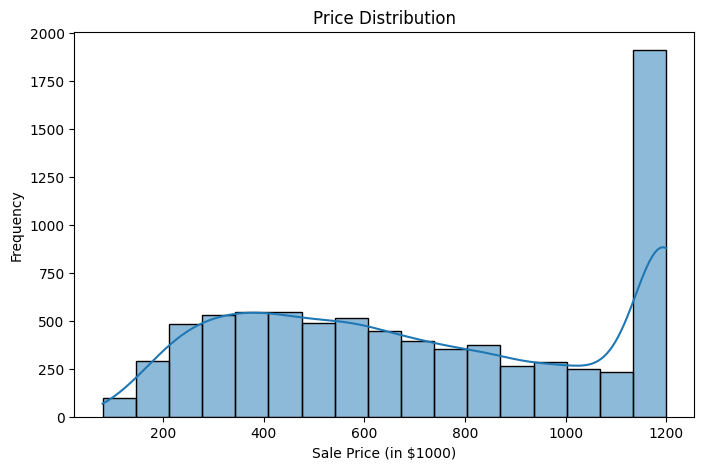

Skewness: 0.07298660946751669


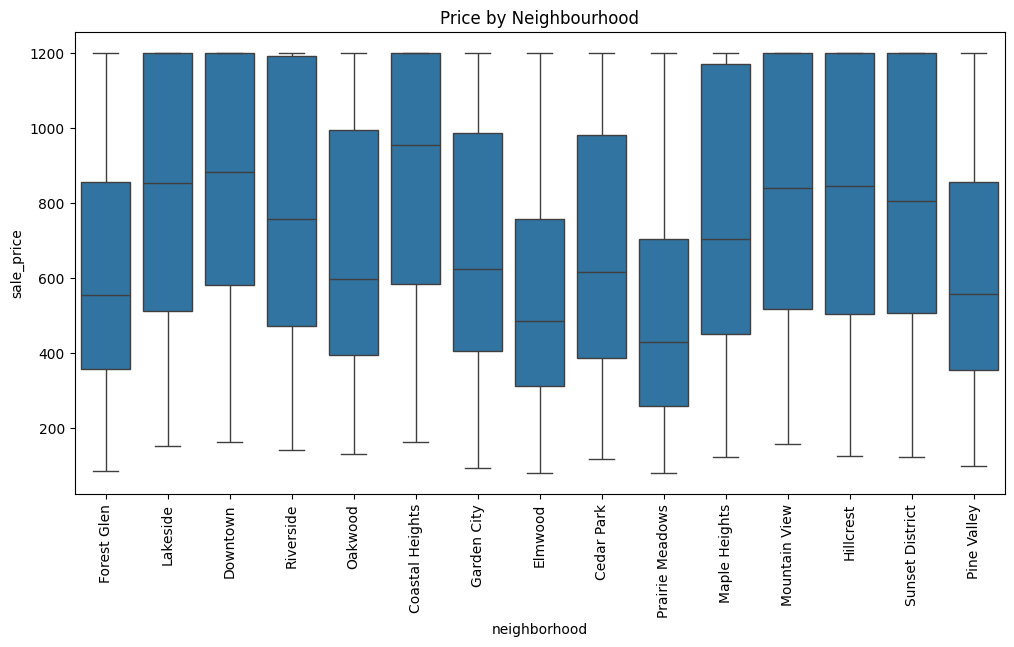

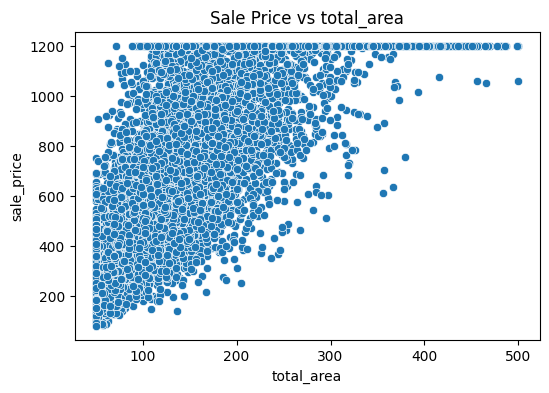

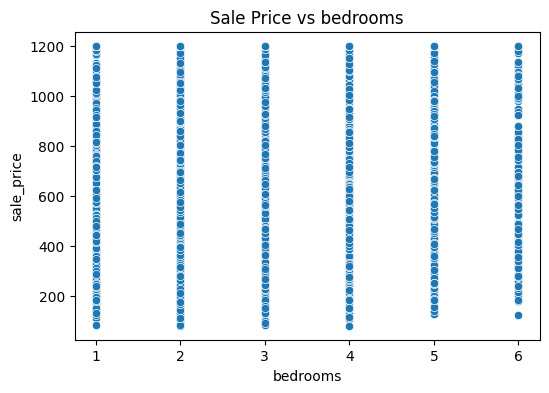

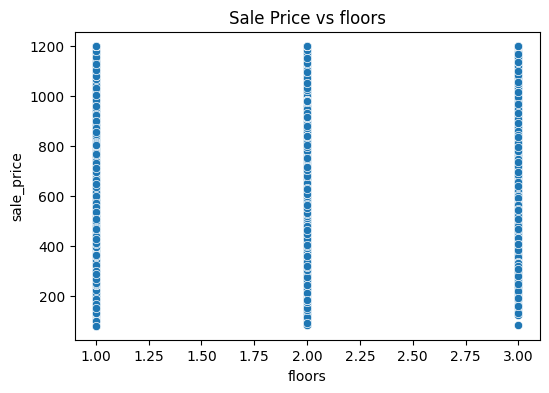

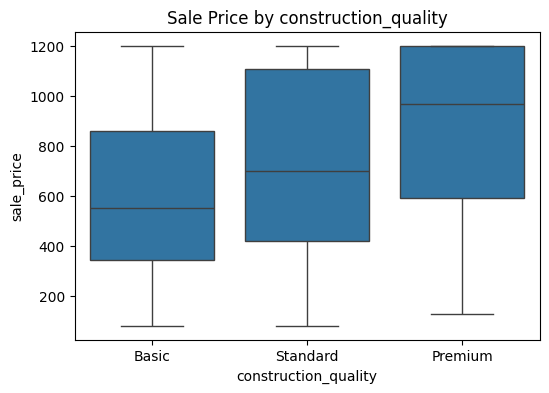

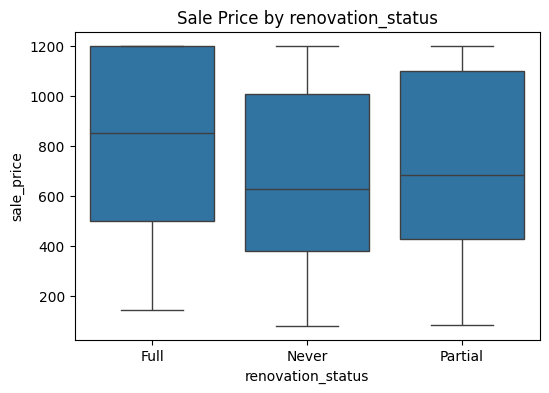

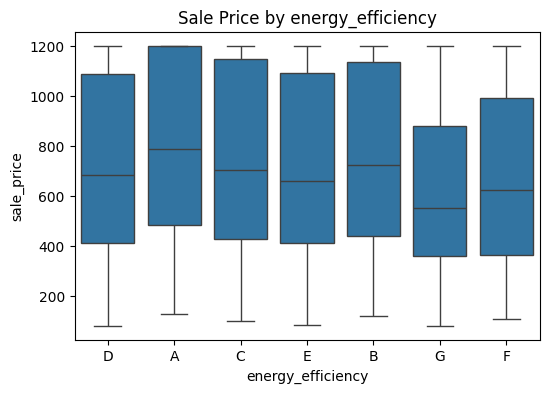

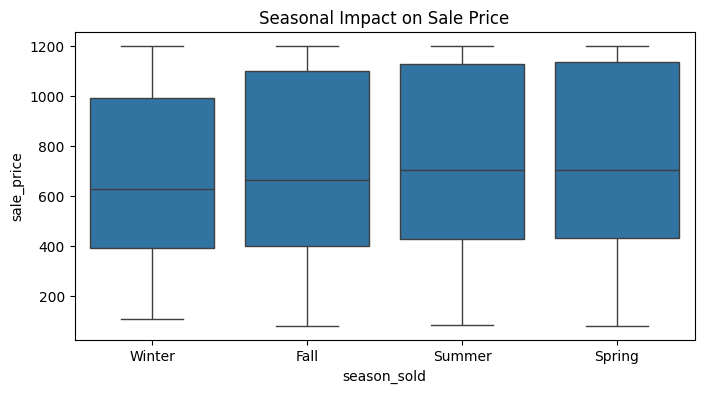

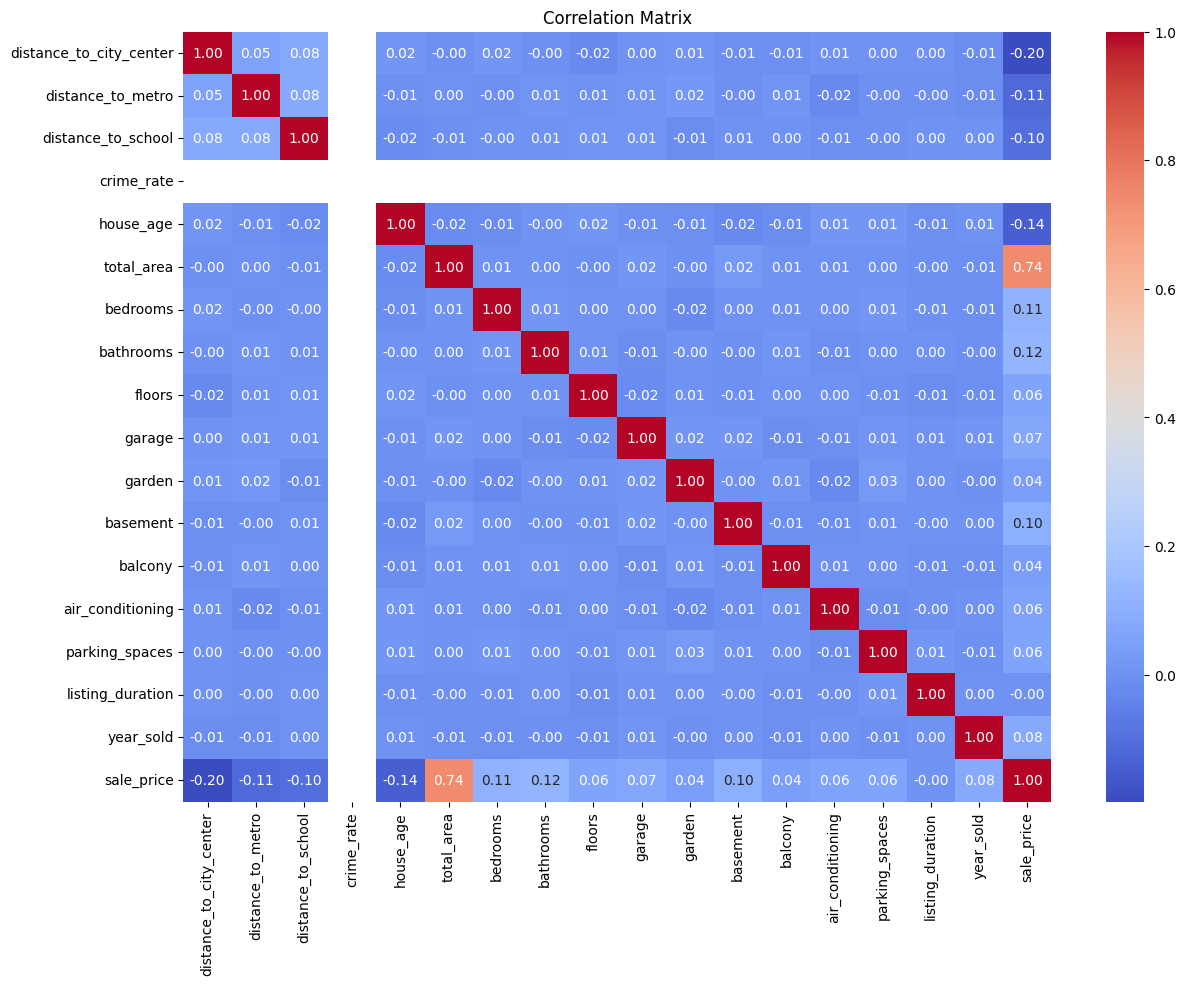

                   Variable           VIF
3                crime_rate  3.603081e+06
2        distance_to_school  1.013575e+00
0   distance_to_city_center  1.010655e+00
1         distance_to_metro  1.009969e+00
10                   garden  1.002940e+00
4                 house_age  1.002711e+00
9                    garage  1.002032e+00
14           parking_spaces  1.001776e+00
13         air_conditioning  1.001760e+00
11                 basement  1.001659e+00
8                    floors  1.001638e+00
6                  bedrooms  1.001525e+00
5                total_area  1.001521e+00
12                  balcony  1.001198e+00
16                year_sold  1.000876e+00
7                 bathrooms  1.000733e+00
15         listing_duration  1.000681e+00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

df = pd.read_csv('house_price_data.csv')

plt.figure(figsize=(8, 5))
sns.histplot(df['sale_price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Sale Price (in $1000)')
plt.ylabel('Frequency')
plt.show()

print("Skewness:", skew(df['sale_price'].dropna()))

plt.figure(figsize=(12, 6))
sns.boxplot(x='neighborhood', y='sale_price', data=df)
plt.xticks(rotation=90)
plt.title('Price by Neighbourhood')
plt.show()

features = ['total_area', 'bedrooms', 'floors']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='sale_price', data=df)
    plt.title(f'Sale Price vs {feature}')
    plt.show()

quality_features = ['construction_quality', 'renovation_status', 'energy_efficiency']
for feature in quality_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature, y='sale_price', data=df)
    plt.title(f'Sale Price by {feature}')
    plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='season_sold', y='sale_price', data=df)
plt.title('Seasonal Impact on Sale Price')
plt.show()

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.select_dtypes(include=['number']).drop(columns=['sale_price']).dropna()
X = add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif.sort_values('VIF', ascending=False))

In [7]:
# Identify categorical and numerical columns (excluding the target variable)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('sale_price') # Remove the target variable

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['property_id', 'neighborhood', 'construction_quality', 'renovation_status', 'heating_type', 'energy_efficiency', 'season_sold']
Numerical columns: ['distance_to_city_center', 'distance_to_metro', 'distance_to_school', 'crime_rate', 'house_age', 'total_area', 'bedrooms', 'bathrooms', 'floors', 'garage', 'garden', 'basement', 'air_conditioning', 'parking_spaces', 'listing_duration', 'year_sold']


In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (like property_id, which we might drop later)
)

# Apply the preprocessing
X = df.drop('sale_price', axis=1)
y = df['sale_price']

X_processed = preprocessor.fit_transform(X)

# Display the shape of the processed data
print("Shape of processed data:", X_processed.shape)

Shape of processed data: (8000, 8051)


In [9]:
from sklearn.model_selection import train_test_split

# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6400, 8051)
Shape of X_test: (1600, 8051)
Shape of y_train: (6400,)
Shape of y_test: (1600,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 20532.079064363446
R² Score: 0.8314209139303451


Mean Absolute Error: 111.6168646812546
Mean Squared Error: 20532.079064363446
Root Mean Squared Error: 143.29019179400748
R² Score: 0.8314209139303451


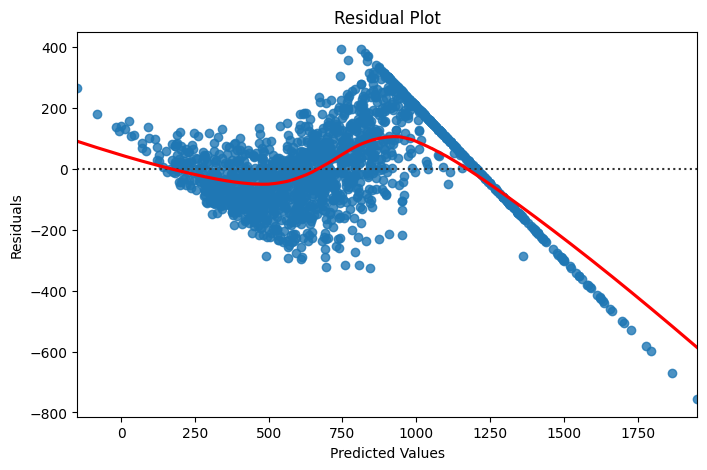

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
